In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
data = pd.read_csv(r"C:\Users\bhumi\OneDrive\Desktop\Time-Series-Forecasting-of-Temperature\Temperature_And_Precipitation_Cities_IN\Bangalore_1990_2022_BangaloreCity.csv", index_col=0)
data

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
02-01-1990,21.7,NaN,26.5,0.0
03-01-1990,21.0,16.4,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...
21-07-2022,23.7,20.5,30.8,82.5
22-07-2022,23.2,21.1,27.9,0.0
23-07-2022,23.1,20.9,26.7,0.0


In [3]:
data.shape

(11894, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11894 entries, 01-01-1990 to 25-07-2022
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    11824 non-null  float64
 1   tmin    10505 non-null  float64
 2   tmax    11265 non-null  float64
 3   prcp    7274 non-null   float64
dtypes: float64(4)
memory usage: 464.6+ KB


In [5]:
data.describe()

,tavg,tmin,tmax,prcp
count,11824.000000,10505.000000,11265.000000,7274.000000
mean,23.840426,19.385131,29.932827,4.414119
std,2.309899,2.367239,2.957866,12.994655
min,17.200000,9.300000,19.800000,0.000000
25%,22.300000,18.100000,27.900000,0.000000
50%,23.500000,19.800000,29.500000,0.000000
75%,25.200000,20.800000,32.000000,2.000000
max,32.400000,27.900000,39.200000,271.300000


In [6]:
data.head()

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
02-01-1990,21.7,NaN,26.5,0.0
03-01-1990,21.0,16.4,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
05-01-1990,20.4,14.2,26.1,0.0


In [7]:
data = data.drop(['tmin', 'tmax', 'prcp'], axis = 1)
data

,tavg
time,
01-01-1990,22.9
02-01-1990,21.7
03-01-1990,21.0
04-01-1990,20.8
05-01-1990,20.4
...,...
21-07-2022,23.7
22-07-2022,23.2
23-07-2022,23.1


In [8]:
data = data.rename(columns={"tavg" : "Temperature"})
data

,Temperature
time,
01-01-1990,22.9
02-01-1990,21.7
03-01-1990,21.0
04-01-1990,20.8
05-01-1990,20.4
...,...
21-07-2022,23.7
22-07-2022,23.2
23-07-2022,23.1


In [9]:
data.isnull().sum()

Temperature    70
dtype: int64

In [10]:
data = data.ffill(axis = 1)
data

,Temperature
time,
01-01-1990,22.9
02-01-1990,21.7
03-01-1990,21.0
04-01-1990,20.8
05-01-1990,20.4
...,...
21-07-2022,23.7
22-07-2022,23.2
23-07-2022,23.1


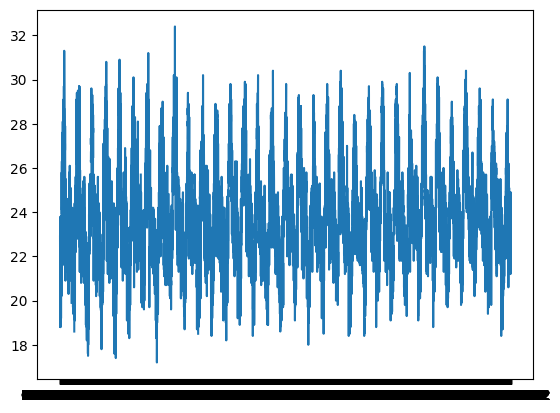

In [11]:
plt.plot(data)

make a bigger graph using fig size, maybe data will be size

In [12]:
# the dataset using values function
values = data.values
 
# getting the count to split the dataset into 3
parts = int(len(values)/3)
 
# splitting the data into three parts
part_1, part_2, part_3 = values[0:parts], values[parts:(
    parts*2)], values[(parts*2):(parts*3)]
 
# calculating the mean of the separated three 
# parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()
 
# calculating the variance of the separated 
# three parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()
 
# printing the mean of three groups
print('mean1=%f, mean2=%f, mean2=%f' % (mean_1, mean_2, mean_3))
 
# printing the variance of three groups
print('variance1=%f, variance2=%f, variance2=%f' % (var_1, var_2, var_3))

mean1=nan, mean2=nan, mean2=24.042558
variance1=nan, variance2=nan, variance2=4.984589


In [17]:
missing_values = np.isnan(data).any()
infinite_values = np.isinf(data).any()
missing_values


Temperature    True
dtype: bool

In [18]:
from statsmodels.tsa.stattools import adfuller

In [21]:
if missing_values.any() or infinite_values.any():
    # Step 2: Handle missing or infinite values
    clean_data = data.dropna()  # Drop rows with missing values
    clean_data = clean_data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)  # Drop rows with infinite values
    
    # Step 3: Ensure data integrity
    # Perform additional checks or transformations if necessary
    
    # Now, run the Augmented Dickey-Fuller test on the cleaned data
    values = clean_data.values
    res = adfuller(values)
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])
    
else:
    # No missing or infinite values, proceed with the Augmented Dickey-Fuller test
    values = data.values
    res = adfuller(values)
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])

Augmented Dickey-Fuller Statistic: -10.783400


In [22]:
if missing_values.any().any() or infinite_values.any().any():
    # Step 2: Handle missing or infinite values
    # Impute missing values with the mean of each column
    data.fillna(data.mean(), inplace=True)
    
    # Replace infinite values with NaN
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Step 3: Ensure data integrity
    # Perform additional checks or transformations if necessary
    
    # Now, run the Augmented Dickey-Fuller test on the cleaned data
    values = data.values
    res = adfuller(values)
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])
    
else:
    # No missing or infinite values, proceed with the Augmented Dickey-Fuller test
    values = data.values
    res = adfuller(values)
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])

Augmented Dickey-Fuller Statistic: -10.628674


This ADF value indicates that the data is obviously stationary